In [42]:
#3.1矢量化加速

%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt
from scipy.stats import norm

In [15]:
n=10000
a=torch.ones([n])
b=torch.ones([n])

In [16]:
class Timer: #@%save
    """记录多次运行时间"""
    def __init__(self):
        self.times = [] # 实例属性，用于存储运行时间。这里初始化为一个空列表。
        self.start() #调用当前实例的start方法，开始计时

    def start(self):
        """启用计时器"""
        self.tik = time.time() #调用time模块的time函数，返回当前时间的时间戳

    def stop(self):
        """停止计时器并且将时间记录在列表中"""
        self.times.append(time.time() - self.tik) #将计算出的时间差追加到self.times列表中
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times) 

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()
        #将self.times列表转换为numpy数组,计算数组的累计和
     

In [18]:
#向量加法的第一种方法
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.13303 sec'

In [21]:
#向量加法的第二种方法，这种计算方法速度更快
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

#f'{.}': 这是一个f-string（格式化字符串字面量），它是Python 3.6及以上版本引入的一种字符串格式化方法。f-string允许你在字符串中嵌入表达式.
#:.5f: 这是一个格式说明符，用于指定浮点数应该被格式化为固定的小数点表示法，并且小数点后保留5位数字.
#' sec': 这是字符串的一部分，表示时间单位“秒”.

'0.00000 sec'

In [22]:
#正态分布与平方损失函数
def normal(x,mu, sigma):
    p= 1/ math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

'\n   [normal(x, mu, sigma) for mu, sigma in params]: \n   这是一个列表推导式，用于生成一个列表。对于params列表中的每个(mu, sigma)元组，\n   它都调用normal(x, mu, sigma)函数\n'

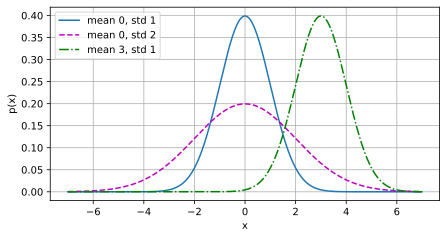

In [41]:
# 再次使用numpy进行可视化
x = np.arange(-7,7,0.01)
#均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(7, 3.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

"""
   [normal(x, mu, sigma) for mu, sigma in params]: 
   这是一个列表推导式，用于生成一个列表。对于params列表中的每个(mu, sigma)元组，
   它都调用normal(x, mu, sigma)函数
"""

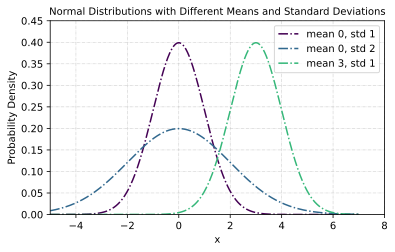

In [36]:
# 定义参数列表
params = [(0, 1), (0, 2), (3, 1)]
 
# 使用列表推导式生成y值（概率密度）
y_values = [norm.pdf(x, mu, sigma) for mu, sigma in params]
 
# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(6, 3.5))
 
# 绘制曲线
for i, (y, (mu, sigma)) in enumerate(zip(y_values, params)):
    ax.plot(x, y, label=f'mean {mu}, std {sigma}',linestyle = '-.')
    # 为每条曲线设置不同的颜色（这里只是示例，你可以根据需要调整）
    ax.lines[-1].set_color(plt.cm.viridis(i / len(y_values)))  # 使用viridis色图
 
# 美化图形
ax.set_xlabel('x', fontsize=10)#设置文本字体大小
ax.set_ylabel('Probability Density', fontsize=10)
ax.set_title('Normal Distributions with Different Means and Standard Deviations', fontsize=10)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, which='both', linestyle='-.', linewidth=0.5, alpha=0.7)
ax.set_xlim(-5, 8)
ax.set_ylim(0, 0.45)  # 根据需要调整y轴的范围
 
# 显示图形
plt.show()